In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
%matplotlib inline

# Основне завдання

## 1. Дослідити дані, підготувати їх для побудови регресійної моделі

### 1.1 Зчитування даних та перевірка на наявність пропущених значень чи дублікатів

In [2]:
wine_df = pd.read_csv('../data/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_df.duplicated().sum()

240

### 1.2 Видалення дублікатів та перевірка типів даних

In [6]:
wine_df.drop_duplicates(inplace=True)
wine_df.reset_index(inplace=True, drop=True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 1.3 Побудова кореляційної матриці

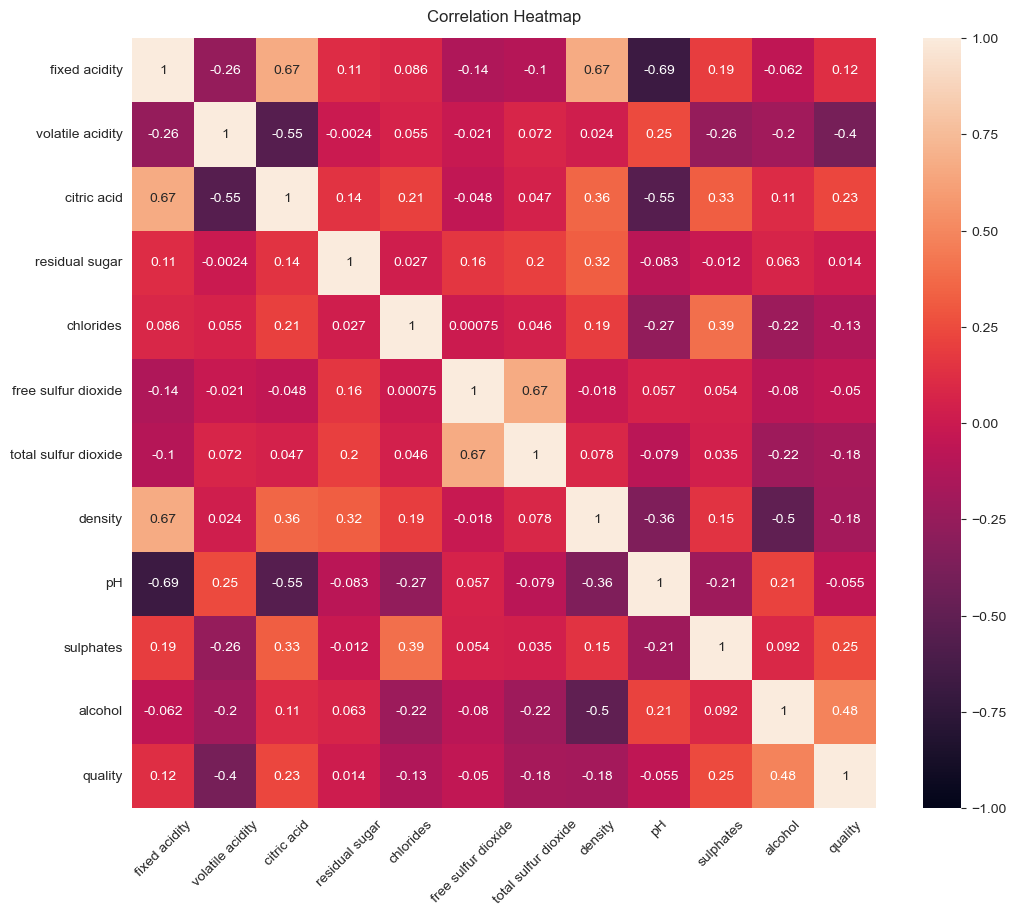

In [8]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(wine_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.xticks(rotation=45);

### 1.4 Видалення ознак, які сильно корелюють з іншими ознаками, та при цьому слабо корелюють з незалежною змінною (якістю вина)

In [9]:
wine_df.drop(columns=['residual sugar', 'free sulfur dioxide', 'pH'], inplace=True)

## 2. Розділити дані на навчальну та тестову вибірки


## 2.1 Розділення даних на навчальну та тестову вибірки (80% до 20% відповідно)

In [10]:
X, y = wine_df.iloc[:, :-1].values, wine_df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Побудувати декілька регресійних моделей для прогнозу якості вина (12 - quality). Використати лінійну регресію та поліноміальну регресію обраного вами виду


### 3.1 Побудова лінійної регресії з використанням стандартизації змінних перед навчанням моделі

In [11]:
linear_regression = make_pipeline(StandardScaler(), LinearRegression())
linear_regression.fit(X_train, y_train);

### 3.2 Створення функції для побудови поліноміальної регресії (для заданого порядку) з використанням стандартизації змінних після генерації поліноміальних змінних перед навчанням моделі

In [12]:
def fit_polynomial(degree):
    polynomial_regression = make_pipeline(PolynomialFeatures(degree=degree), StandardScaler(), LinearRegression())
    polynomial_regression.fit(X_train, y_train)
    return polynomial_regression

## 4. Використовуючи тестову вибірку, з'ясувати яка з моделей краща

### 4.1 Використання метрик MSE (mean squared error) та MAE (mean absolute error) для оцінки лінійної регресії та поліноміальних регресій (2, 3 та 4 порядків) на тестових даних

In [13]:
linear_predictions = linear_regression.predict(X_test)
predictions = [linear_predictions]
mae_list = [mean_absolute_error(y_test, linear_predictions)]
mse_list = [mean_squared_error(y_test, linear_predictions)]
for degree in range(2, 5):
    polynomial_predictions = fit_polynomial(degree).predict(X_test)
    predictions.append(polynomial_predictions)
    mse_list.append(mean_absolute_error(y_test, polynomial_predictions))
    mae_list.append(mean_squared_error(y_test, polynomial_predictions))
result_df = pd.DataFrame({'MSE': mse_list, 'MAE': mae_list})
result_df.index = [f'polynomial regression ({i} degree)' if i > 1 else 'linear regression' for i in range(1, 5)]
result_df

,MSE,MAE
linear regression,0.472928,0.537541
polynomial regression (2 degree),0.528549,0.461776
polynomial regression (3 degree),0.568741,0.879968
polynomial regression (4 degree),1.196262,8.791117


In [14]:
result_df.loc[result_df['MSE'].idxmin()]

MSE    0.472928
MAE    0.537541
Name: linear regression, dtype: float64

### Беручи метрику MSE як основну, отриамємо, що лінійна регресія є найкращою для наших даних.

### 4.2 Побудова графіку залежності MSE від порядку регресії

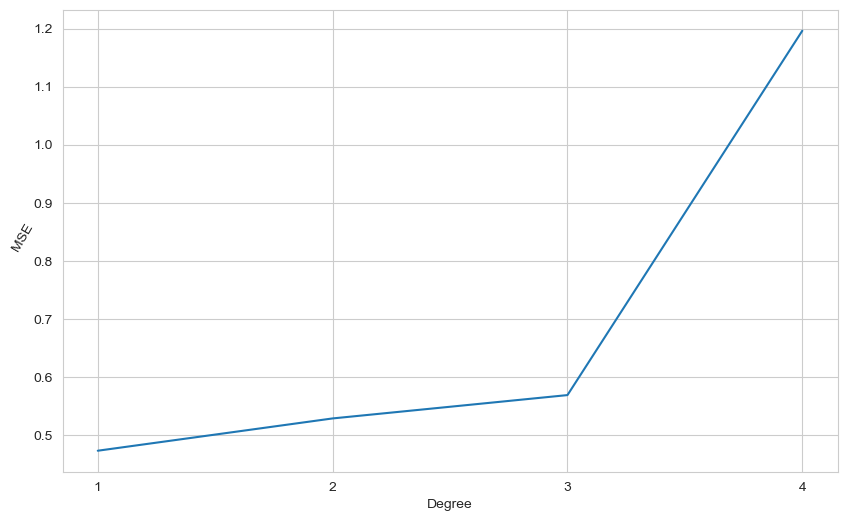

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), result_df['MSE'])
plt.xlabel('Degree')
plt.xticks(range(1, 5))
plt.ylabel('MSE', rotation=60);

### Отже, по даному графіку видно, що MSE лінійної регресії є найменшою, поліноміальна регресія вже має більшу помилку, що збільшується суттєво при 4-му порядку. Це означає, що для наших даних поліномоіальна регресія демонструє перенавчання.

# Додаткове завдання

## 1. Дослідити дані, сказати чи є мультиколінеарність, побудувати діаграми розсіювання

### 1.1 Зчитування даних, перейменування стовпця з назвами країн англійською, перевірка на наявність пропущених значень і дублікатів, заміна коми на крапку в якості розділювача дробної частини та перетворення типів даних стовпців з числовими даними на числові

In [16]:
df = pd.read_csv('../data/Data4.csv', delimiter=';', encoding='cp1251')
df.head()

,Unnamed: 0,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,"0,97392353","0,605347614","0,538672856","0,510112666"
1,Algeria,DZA,Алжир,"0,782134498","0,58721932","0,348159396","0,497985576"
2,Angola,AGO,Ангола,"0,372343539","0,27439361","0,332117384","0,346906645"
3,Argentina,ARG,Аргентина,"0,883830062","0,699685109","0,28199471","0,518820368"
4,Armenia,ARM,Вірменія,"1,016498793","0,718326882","0,535647909","0,486498047"


In [17]:
df.tail()

,Unnamed: 0,ISO,UA,Cql,Ie,Iec,Is
127,Uruguay,URY,Уруґвай,"1,198779297","0,612819394","0,568066795","0,648818585"
128,"Venezuela, Bolivarian Republic of",VEN,"Венесуела, Боліварська Республіка","0,703459931","0,670452164","0,249923267","0,367243869"
129,Viet Nam,VNM,В'єтнам,"0,553255653","0,371843431","0,39385414","0,423359346"
130,Yemen,YEM,Ємен,"0,364579432","0,244049144","0,357659851","0,330743343"
131,Zambia,ZMB,Замбія,"0,689322125","0,495702141","0,442525331","0,424261463"


In [18]:
df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,"0,97392353","0,605347614","0,538672856","0,510112666"
1,Algeria,DZA,Алжир,"0,782134498","0,58721932","0,348159396","0,497985576"
2,Angola,AGO,Ангола,"0,372343539","0,27439361","0,332117384","0,346906645"
3,Argentina,ARG,Аргентина,"0,883830062","0,699685109","0,28199471","0,518820368"
4,Armenia,ARM,Вірменія,"1,016498793","0,718326882","0,535647909","0,486498047"


In [19]:
df.isna().sum()

Country    0
ISO        0
UA         0
Cql        0
Ie         0
Iec        0
Is         0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
for column in df.loc[:, 'Cql':].columns:
    df[column] = df[column].str.replace(',', '.')
    df[column] = df[column].str.replace('-', '')
    df[column] = df[column].astype(float)
df.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Albania,ALB,Албанія,0.973924,0.605348,0.538673,0.510113
1,Algeria,DZA,Алжир,0.782134,0.587219,0.348159,0.497986
2,Angola,AGO,Ангола,0.372344,0.274394,0.332117,0.346907
3,Argentina,ARG,Аргентина,0.883830,0.699685,0.281995,0.518820
4,Armenia,ARM,Вірменія,1.016499,0.718327,0.535648,0.486498


### 1.2 Побудова кореляційної матриці для перевірки даних на мультиколінеарність (а саме для незалежних змінних)

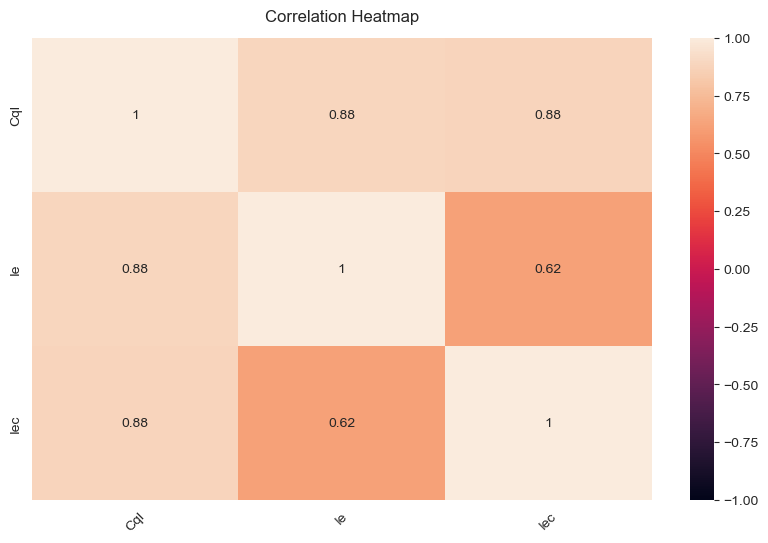

In [24]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.iloc[:, 3:-1].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.xticks(rotation=45);

### 1.3 Використання фактору дисперсії інфляції (VIF) ( 1 / (1 - R^2^), де R^2^ – це коефіцієнт детермінації лінійної регресійної для прогнозування конкретної змінної через інші) для перевірки даних на мультиколінеарність

In [25]:
vif_df = pd.DataFrame()
features = ['Cql', 'Ie', 'Iec']
vif_df["feature"] = features
vif_df["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
vif_df

,feature,VIF
0,Cql,100.377572
1,Ie,43.512988
2,Iec,37.728691


### Оскільки на кореляційній матриці коефіцієнти кореляції близькі до 1 та значення VIF сильно більші за 5 для всіх змінних, то це свідчить про сильну мультиколінеарність незалежних змінних.

### 1.4 Побудова діаграм розсіювання з регресійними прямими для відображення кореляції для усіх пар змінних (не тільки незалежних)

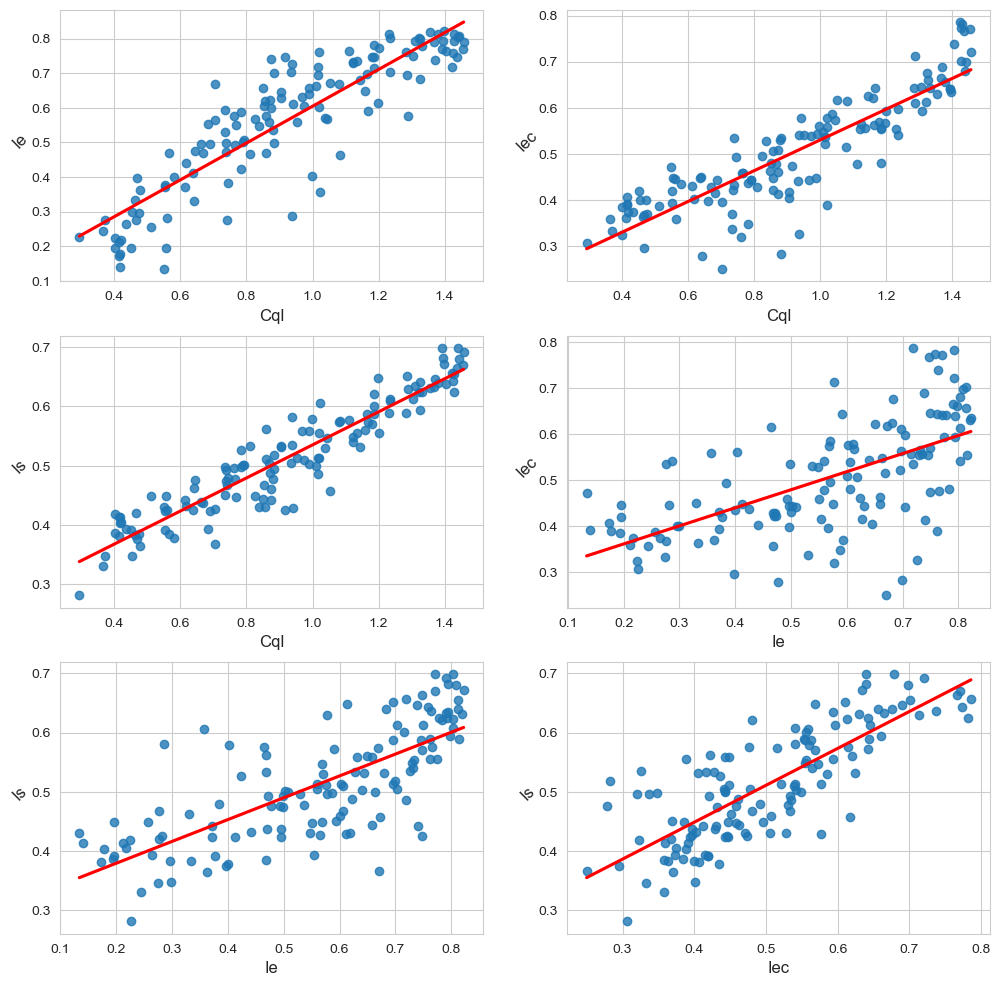

In [26]:
figure, ax = plt.subplots(3, 2, figsize=(12, 12))
columns = df.columns[3:]
for i, (column_1, column_2) in enumerate(combinations(columns, 2)):
    sns.regplot(ax=ax[i // 2][i % 2], x=df[column_1], y=df[column_2], ci=None, line_kws={"color": "red"})
    ax[i // 2][i % 2].set_ylabel(column_2, rotation=45)
    ax[i // 2][i % 2].xaxis.label.set_fontsize(12)
    ax[i // 2][i % 2].yaxis.label.set_fontsize(12)

## 2. Побудувати декілька регресійних моделей (використати лінійну регресію та поліноміальну регресію обраного вами виду)

### 2.1 Розділення даних на матрицю незалежних змінних та вектор залежної (цільової) змінної

In [27]:
X_train, y_train = df.loc[:, 'Cql': 'Iec'].values, df.iloc[:, -1].values

### 2.2 Побудова лінійної регресії з використанням стандартизації змінних перед навчанням моделі

In [28]:
linear_regression = make_pipeline(StandardScaler(), LinearRegression())
linear_regression.fit(X_train, y_train);

### 2.3 Створення функції для побудови поліноміальної регресії (для заданого порядку) з використанням стандартизації змінних після генерації поліноміальних змінних перед навчанням моделі

In [29]:
def fit_polynomial(degree):
    polynomial_regression = make_pipeline(PolynomialFeatures(degree=degree), StandardScaler(), LinearRegression())
    polynomial_regression.fit(X_train, y_train)
    return polynomial_regression

## 3. Використовуючи тестову вибірку з файлу Data4t.csv, з'ясувати яка з моделей краща

### 3.1 Зчитування даних тестової виборки та виконання їх форматування аналогічно до форматування навчальної вибірки

In [30]:
test_df = pd.read_csv('../data/Data4t.csv', delimiter=';', encoding='cp1251')
test_df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
for column in df.loc[:, 'Cql':].columns:
    test_df[column] = test_df[column].str.replace(',', '.')
    test_df[column] = test_df[column].str.replace('-', '')
    test_df[column] = test_df[column].astype(float)
test_df.head()

,Country,ISO,UA,Cql,Ie,Iec,Is
0,Togo,TGO,Того,0.453498,0.216806,0.368235,0.433951
1,Tunisia,TUN,Туніс,0.899462,0.659124,0.418256,0.514746
2,Turkey,TUR,Туреччина,0.859284,0.498840,0.509228,0.499453
3,Uganda,UGA,Уґанда,0.571284,0.362946,0.448732,0.375726
4,Ukraine,UKR,Україна,0.802204,0.689164,0.303555,0.462744


### 3.2 Розділення тестової вибірки на матрицю незалежних змінних та вектор цільової змінної

In [31]:
X_test, y_test = test_df.loc[:, 'Cql': 'Iec'].values, test_df.iloc[:, -1].values

### 3.3 Використання метрик MSE (mean squared error) та MAE (mean absolute error) для оцінки лінійної регресії та поліноміальних регресій (2-8 порядків) на тестових даних

In [32]:
linear_predictions = linear_regression.predict(X_test)
predictions = [linear_predictions]
mae_list = [mean_absolute_error(y_test, linear_predictions)]
mse_list = [mean_squared_error(y_test, linear_predictions)]
for degree in range(2, 9):
    polynomial_predictions = fit_polynomial(degree).predict(X_test)
    predictions.append(polynomial_predictions)
    mse_list.append(mean_absolute_error(y_test, polynomial_predictions))
    mae_list.append(mean_squared_error(y_test, polynomial_predictions))
result_df = pd.DataFrame({'MSE': mse_list, 'MAE': mae_list})
result_df.index = [f'polynomial regression ({i} degree)' if i > 1 else 'linear regression' for i in range(1, 9)]
result_df

,MSE,MAE
linear regression,0.000247,0.014448
polynomial regression (2 degree),0.005825,0.000054
polynomial regression (3 degree),0.003858,0.000035
polynomial regression (4 degree),0.002861,0.000019
polynomial regression (5 degree),0.002880,0.000024
polynomial regression (6 degree),0.001377,0.000005
polynomial regression (7 degree),0.004774,0.000042
polynomial regression (8 degree),0.014365,0.000879


In [33]:
result_df.loc[result_df['MSE'].idxmin()]

MSE    0.000247
MAE    0.014448
Name: linear regression, dtype: float64

### Беручи метрику MSE як основну, отриамємо, що лінійна регресія є найкращою для наших даних.

### 3.4 Побудова графіку залежності MSE від порядку регресії

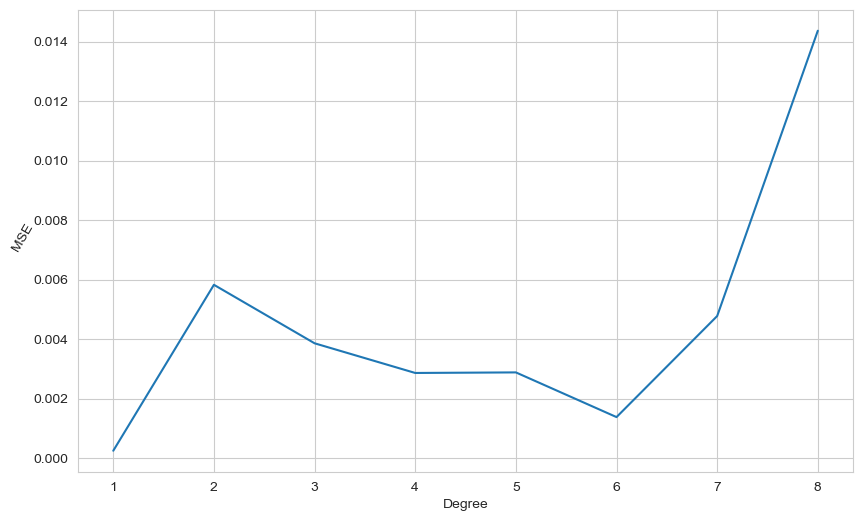

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), result_df['MSE'])
plt.xlabel('Degree')
plt.ylabel('MSE', rotation=60);

### Отже, по даному графіку видно, що MSE лінійної регресії є найменшою, поліноміальна регресія вже має більшу помилку. Видно, що з 2-го по 6-й порядок MSE зменшується, проте все ще більша, ніж у лінійної регресії, а далі суттєво збільшується. Це означає, що для наших даних поліномоіальна регресія демонструє перенавчання.